In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# from printecream import print
from pathlib import Path

# determine the path to the data file
csv_path = Path("csv")
filename = "dataset-of-10s.csv"
abs_path = csv_path / filename

In [2]:
# read data from csv
df = pd.read_csv(abs_path)
print(type(df))
print(df.shape)
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
(6398, 19)
                                 track                          artist  \
0                          Wild Things                    Alessia Cara   
1                            Surfboard                       Esquivel!   
2                         Love Someone                    Lukas Graham   
3  Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4        Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   
5           Here's To Never Growing Up                   Avril Lavigne   
6                     Sex Metal Barbie                  In This Moment   
7                        Helluva Night                        Ludacris   
8                      Holiday With HH                         No Bros   
9                              My Last  Big Sean Featuring Chris Brown   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:2ZyuwVvV6Z3XJaXIFbspeE         0.741   

In [3]:
# rename duration_ms to duration_min
df.rename(columns={"duration_ms": "duration_min"}, inplace=True)

# convert column duration_ms to duration_min
df["duration_min"] = df["duration_min"] / 60000

# round duration_min to 2 decimal places
df["duration_min"] = df["duration_min"].round(2)
print(df.head(5))

                                 track                          artist  \
0                          Wild Things                    Alessia Cara   
1                            Surfboard                       Esquivel!   
2                         Love Someone                    Lukas Graham   
3  Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4        Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:2ZyuwVvV6Z3XJaXIFbspeE         0.741   0.626  1.0    -4.826   
1   spotify:track:61APOtq25SCMuKV5w2Kgp         0.447   0.247  5.0   -14.661   
2  spotify:track:2JqnpexlO9dmvjUMCaLCLJ         0.550   0.415  9.0    -6.557   
3   spotify:track:cjfLhk8WJ3etPTCseKXtk         0.520   0.648  NaN    -5.698   
4  spotify:track:1lItf5ZXJc1by9SbPeljFd         0.870   0.887  1.0    -3.892   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \

In [4]:
# find isna values
print(df.isna().sum())

# fill na values
df.fillna(0, inplace=True)
print(df.isna().sum())

# drop na values
df.dropna(inplace=True)
print(df.isna().sum())

track                  0
artist                 0
uri                    0
danceability           0
energy                 0
key                  715
loudness               0
mode                2268
speechiness            0
acousticness           5
instrumentalness    2406
liveness               0
valence                1
tempo                  0
duration_min           0
time_signature         1
chorus_hit             7
sections               0
target              3199
dtype: int64
track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_min        0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64
track               0
artist              0
uri                 0
danceability   

In [5]:
# loc and iloc
print(df.loc[0:5, "duration_min"])
print(df.iloc[0:5, 0:2])

0    3.14
1    0.29
2    0.42
3    0.32
4    2.40
5    0.36
Name: duration_min, dtype: float64
                                 track                          artist
0                          Wild Things                    Alessia Cara
1                            Surfboard                       Esquivel!
2                         Love Someone                    Lukas Graham
3  Music To My Ears (feat. Tory Lanez)                   Keys N Krates
4        Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall


In [6]:
# select artist, group by track, artist, danceability, and loudness
df_grouped = df[(df["artist"] == "Katy Perry") & (df["danceability"] > 0.5)].groupby(
    ["track", "artist", "danceability", "loudness"],
    sort=False
)

In [9]:
print(df_grouped.tail())

                             track      artist  \
233                     Part Of Me  Katy Perry   
1958                      Birthday  Katy Perry   
2638                    Wide Awake  Katy Perry   
3053  Last Friday Night (T.G.I.F.)  Katy Perry   
3543                          Roar  Katy Perry   
3767             Never Really Over  Katy Perry   
3978                          Rise  Katy Perry   
5098                      Firework  Katy Perry   
5817         The One That Got Away  Katy Perry   
5864             This Is How We Do  Katy Perry   
6395                 Teenage Dream  Katy Perry   

                                       uri  danceability  energy   key  \
233    spotify:track:1nZzRJbFvCEct3uzu4ZoL         0.678   0.918   5.0   
1958  spotify:track:2xLOMHjkOK8nzxJ4r6yOKR         0.719   0.674  11.0   
2638  spotify:track:5JLv62qFIS1DR3zGEcApRt         0.514   0.683   5.0   
3053   spotify:track:455AfCsOhhLPRc68sE1D8         0.649   0.815   3.0   
3543  spotify:track:6F5c58TME

In [7]:
# unique artists (return last 10)
print(df["artist"].unique()[-10:])

['Masahiro Sugaya' 'Mary Lou Lord' 'Mortification' 'The London Suede'
 'Flo Rida & 99 Percent' 'Mělník Philharmonic Orchestra'
 'Trippie Redd Featuring DaBaby' 'Regentum' 'Liam Payne Featuring Quavo'
 'The Neighbourhood']


In [10]:
%matplotlib inline

track                         artist      danceability  loudness
Part Of Me                    Katy Perry  0.678         -4.630      AxesSubplot(0.125,0.11;0.775x0.77)
Birthday                      Katy Perry  0.719         -5.122      AxesSubplot(0.125,0.11;0.775x0.77)
Wide Awake                    Katy Perry  0.514         -5.990      AxesSubplot(0.125,0.11;0.775x0.77)
Last Friday Night (T.G.I.F.)  Katy Perry  0.649         -3.796      AxesSubplot(0.125,0.11;0.775x0.77)
Roar                          Katy Perry  0.554         -4.821      AxesSubplot(0.125,0.11;0.775x0.77)
Never Really Over             Katy Perry  0.770         -4.792      AxesSubplot(0.125,0.11;0.775x0.77)
Rise                          Katy Perry  0.553         -6.445      AxesSubplot(0.125,0.11;0.775x0.77)
Firework                      Katy Perry  0.638         -4.968      AxesSubplot(0.125,0.11;0.775x0.77)
The One That Got Away         Katy Perry  0.687         -4.230      AxesSubplot(0.125,0.11;0.775x0.77)
This Is 

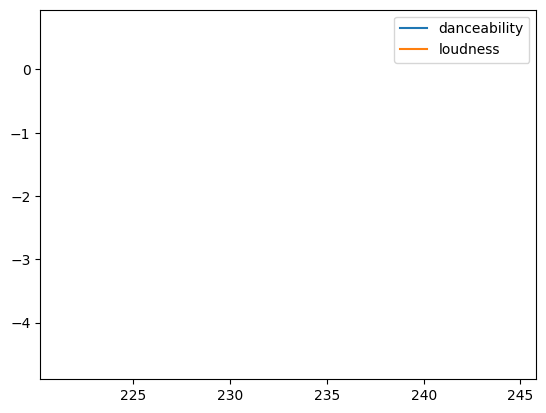

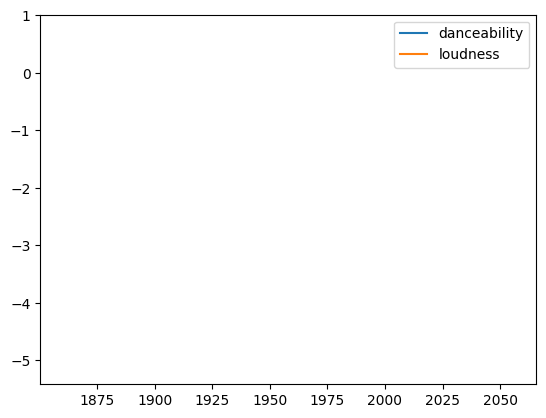

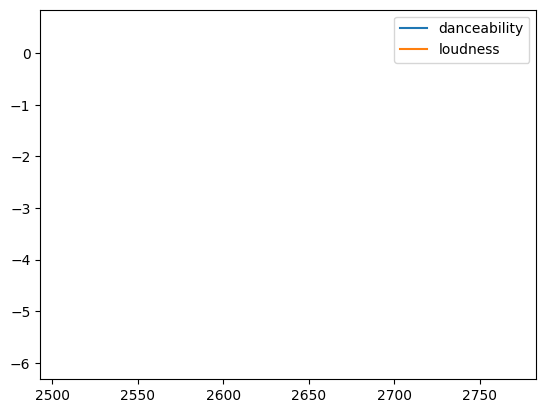

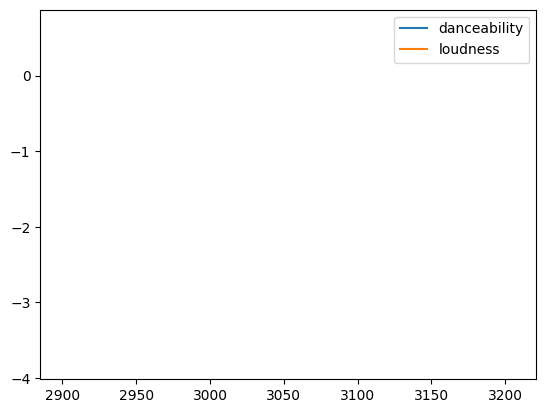

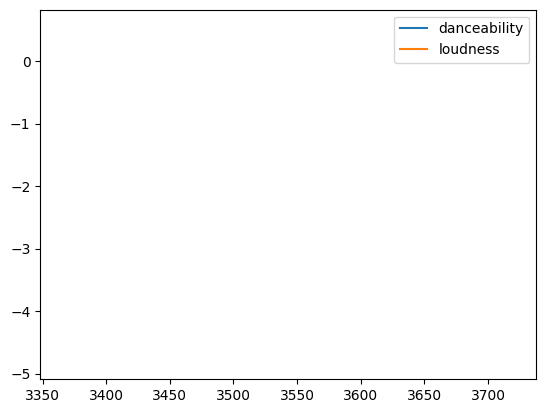

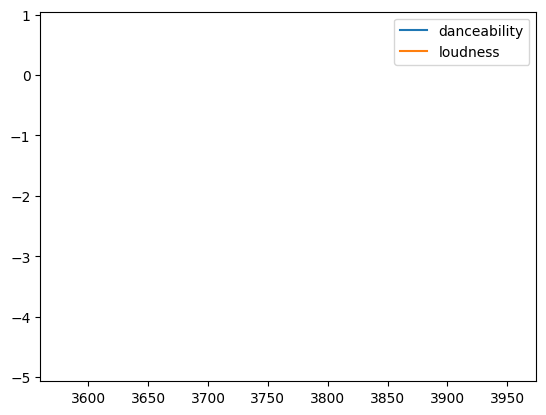

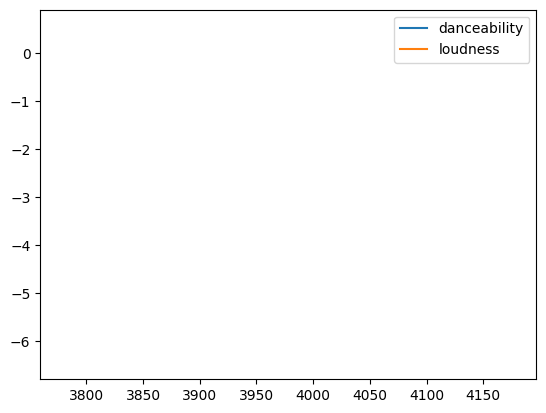

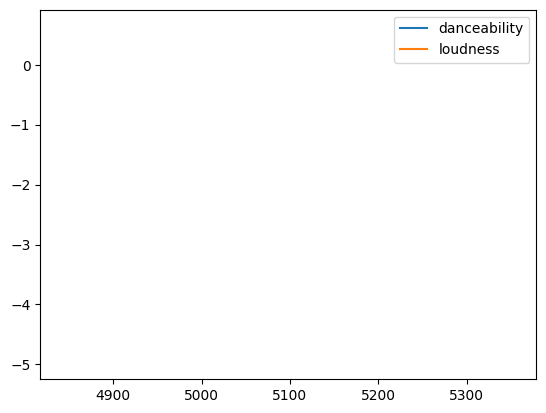

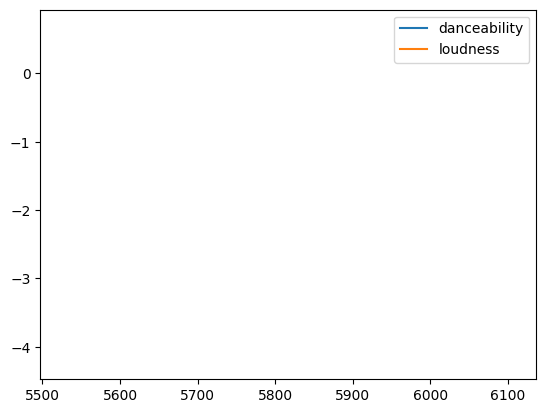

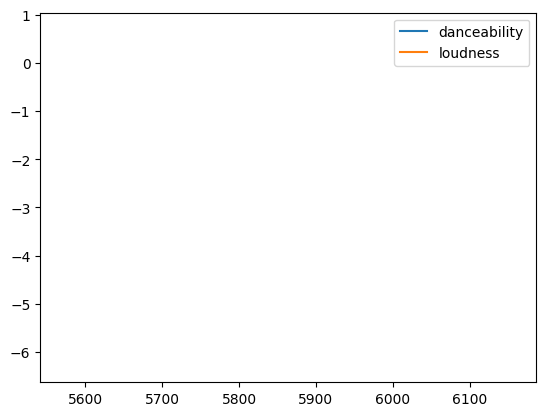

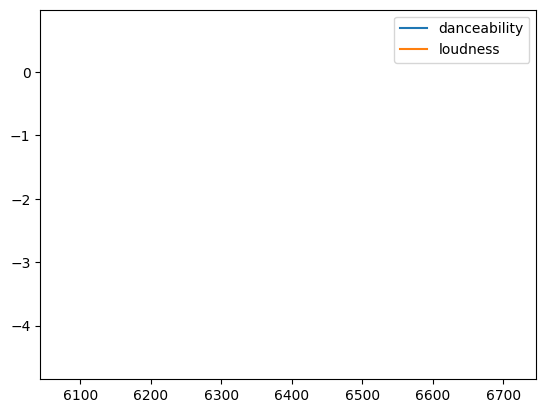

In [11]:
# TODO: fix this janky bonus code ¯\_(ツ)_/¯

# plot grouped data selecting track, danceability, and loudness
# df_grouped[["track", "danceability", "loudness"]].plot()

# plot grouped data selecting track, danceability, and loudness
df_grouped[["danceability", "loudness"]].plot()